In [ ]:
from sportsreference.nba.roster import Roster
from sportsreference.nba.roster import Player
from sportsreference.nba.teams import Teams
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from matplotlib import pyplot as plt

def benchdepth(x, y, z):
    team = Roster(x, year=y, slim = True)
    teamdict = team.players
    player_list = []
    bench = []
    for a in teamdict:
        player_list.append(a)
    for i in range(len(player_list)):
        player = Player(player_list[i])
        games = player(z).games_played
        minutes = player(z).minutes_played
        per = player(z).player_efficiency_rating
        starts = player(z).games_started
        if(minutes/games > 10 and starts/games < 0.75 and games > 30):
            bench.append(per)
    dev_initial = 0
    for m in range(len(bench)):
        dev = bench[m] - 15
        dev_initial += dev
    deviation = dev_initial / len(bench)
    return deviation

#This function returns standard deviation of PER (player efficiency rating) for all qualified bench players of a given team.
#The functions takes the input of team abbreviation, season year, and official season year span.

def compareteams(t1, t2, y1, y2, ys1, ys2):
    team1 = benchdepth(t1, y1, ys1)
    team2 = benchdepth(t2, y2, ys2)
    diff = team1 - team2
    return diff

def seasonbenchdepth(a, b):
    teamlist = []
    teams = Teams()
    for team in teams:
        teamlist.append(team.abbreviation)
    sumseason = 0
    for i in range(len(teamlist)):
        sumseason += benchdepth(teamlist[i], a, b)
    seasonavg = sumseason/len(teamlist)
    return seasonavg

def comparetoleague(m, n, p):
    avg = seasonbenchdepth(n, p)
    team = benchdepth(m, n, p)
    diff = team - avg
    return diff


#playoff scoring metric: every round won is 1 point so that the title winning team gets 4 points for 4 rounds won. There
# is a bonus of 1 point for making it to the conference finals and a bonus of 2 for making it to the nba finals. Thus a team
#wins the championship gets a score of 7




In [24]:
import pandas as pd
df = pd.DataFrame()


df['Teams'] = ['POR', 'DAL', 'UTA', 'OKC', 'HOU', 'DEN', 'LAC', 'LAL', 'ORL', 'BRK', 'PHI', 'MIA', 'IND', 'BOS', 'TOR', 'MIL']

df['Playoff Score'] = [0, 0, 0, 0, 1, 3, 1, 7, 0, 0, 0, 6, 0, 4, 1, 1]
df['Depth Score'] = [-2.5500000000000003, -1.2538461538461543, -1.688888888888889, -3.3142857142857145, -3.5181818181818176, -0.9600000000000003, -1.3250000000000002, -1.8999999999999992, -2.190909090909091, -2.835294117647059, -2.2363636363636363, -1.446153846153846, -1.55, -1.75, -0.7800000000000005, -2.5799999999999996]





features = df[['Depth Score']]
outcome = df[['Playoff Score']]
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.75)
model = LinearRegression()
model.fit(features_train, outcome_train)
print(model.score(features_test, outcome_test))


# correlation between depth and playoff performance is nonexistent

-0.3215736676660199


In [20]:
t = ['POR', 'DAL', 'UTA', 'OKC', 'HOU', 'DEN', 'LAC', 'LAL', 'ORL', 'BRK', 'PHI', 'MIA', 'IND', 'BOS', 'TOR', 'MIL']
for i in t:
    print(benchdepth(i, 2020, '2019-2020'))

-2.5500000000000003
-1.2538461538461543
-1.688888888888889
-3.3142857142857145
-3.5181818181818176
-0.9600000000000003
-1.3250000000000002
-1.8999999999999992
-2.190909090909091
-2.835294117647059
-2.2363636363636363
-1.446153846153846
-1.55
-1.75
-0.7800000000000005
-2.5799999999999996


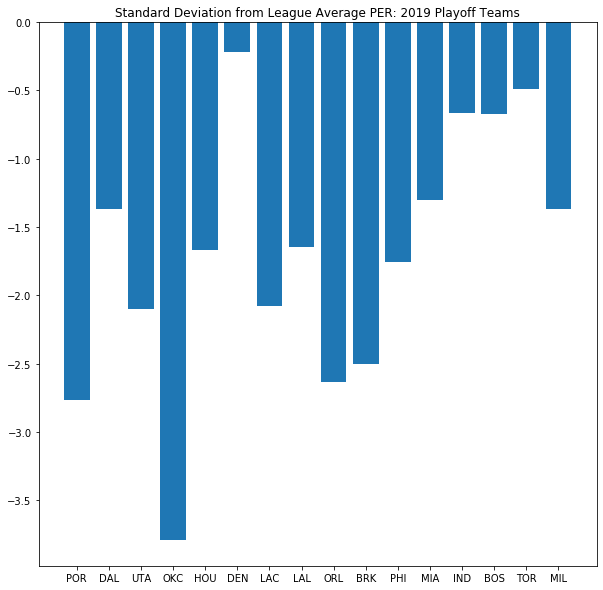

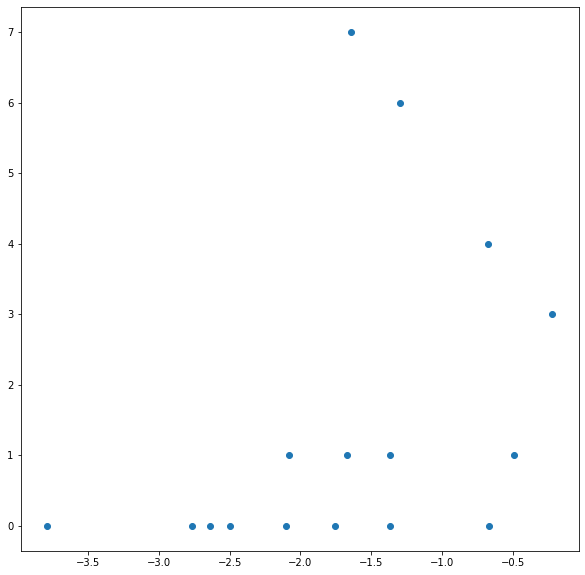

In [92]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.bar(teams2019, depth)
plt.title('Standard Deviation from League Average PER: 2019 Playoff Teams')
plt.show()

fig2 = plt.figure(figsize=(10, 10))
plt.scatter(depth, score)
plt.show()

In [ ]:
##     Determining the statistics that correlate strongly to actual performance
from sportsreference.nba.roster import Roster
from sportsreference.nba.roster import Player
from sportsreference.nba.teams import Teams



def per(x, y, z):
    team = Roster(x, year=y, slim = True)
    teamdict = team.players
    player_list = []
    bench = []
    for a in teamdict:
        player_list.append(a)
    for i in range(len(player_list)):
        player = Player(player_list[i])
        games = player(z).games_played
        minutes = player(z).minutes_played
        per = player(z).player_efficiency_rating
        starts = player(z).games_started
        if(minutes/games > 10 and starts/games < 0.75 and games > 30):
            bench.append(per)
    dev_initial = 0
    for m in range(len(bench)):
        dev = bench[m] - 15
        dev_initial += dev
    deviation = dev_initial / len(bench)
    return deviation


In [ ]:
# Number of teams that gave more than 8 players significant playing time in th playoffs over the past 10 years
# Hand tracked data
# Significant playing time = at least 15 minutes per game
playoffs_2020 = 0.25
playoffs_2019 = 0.25
playoffs_2018 = 0.25
playoffs_2017
playoffs_2016
playoffs_2015
playoffS_2014
playoffs_2013
playoffs_2012
playoffs_2011